In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [30]:
episodes=pd.read_csv('tv_series_episodes.csv')
series=pd.read_csv('tv_series.csv')

series.replace('&apos;', '\'', regex=True, inplace=True)
series.replace('&amp;', '&', regex=True, inplace=True)


episodes.replace('&apos;', '\'', regex=True, inplace=True)
episodes.replace('&amp;', '&', regex=True, inplace=True)
episodes.dropna(inplace=True)


In [4]:
episodes_number_total=episodes.groupby('tv_show').count()['episode'].to_frame().reset_index()

In [5]:
episodes.sort_values(['tv_show','season','episode'], inplace=True)

In [6]:
episodes.reset_index(drop=True, inplace=True)

In [7]:
for i in episodes_number_total.tv_show.values:
    n=episodes_number_total.loc[episodes_number_total['tv_show']==i,'episode'].values
    episodes.loc[episodes['tv_show']==i,'episodes_number_total']=np.arange(1,n+1)

In [8]:
episodes['year']=episodes.release_date.astype('datetime64[ns]').dt.year

In [9]:
series['release_date']=0



In [10]:
for show in episodes.tv_show.unique():
    series.loc[series['title'] == show, 'release_date']=episodes[episodes['tv_show']==show].year.min()
    

In [11]:
series_subset=[ 'Mad Men', 'The Sopranos', 'Breaking Bad', 'Fleabag', 'Game of Thrones',
'Atlanta',  'BoJack Horseman', 'The Wire',  'Rick and Morty', 'Seinfeld', 
'Fargo', 'Black Mirror','The Simpsons','Lost','Mr. Robot', 'Friends', 'The Office', 'South Park',
'Better Call Saul', 'How I Met Your Mother', 'The Twilight Zone', 'Community', 'Grey\'s Anatomy',
'Band of Brothers','Chernobyl','House M.D.','True Detective', 'Stranger Things',
'Dark', 'Avatar: The Last Airbender', 'The Mandalorian','Futurama','Adventure Time',
'The Queen\'s Gambit', 'The Rehearsal', 'The Last Dance', 'Shogun', 'Dexter',
'Supernatural', ] #

In [12]:
episodes_pivot=episodes[episodes.tv_show.isin(series_subset)].pivot("tv_show", "episodes_number_total", "rating")

In [13]:


c = ["#cb0000","#dcb64d","#048133"]
v = [0,.14,1.]
l = list(zip(v,c))
cmap_new2=LinearSegmentedColormap.from_list('rg',l, N=256)

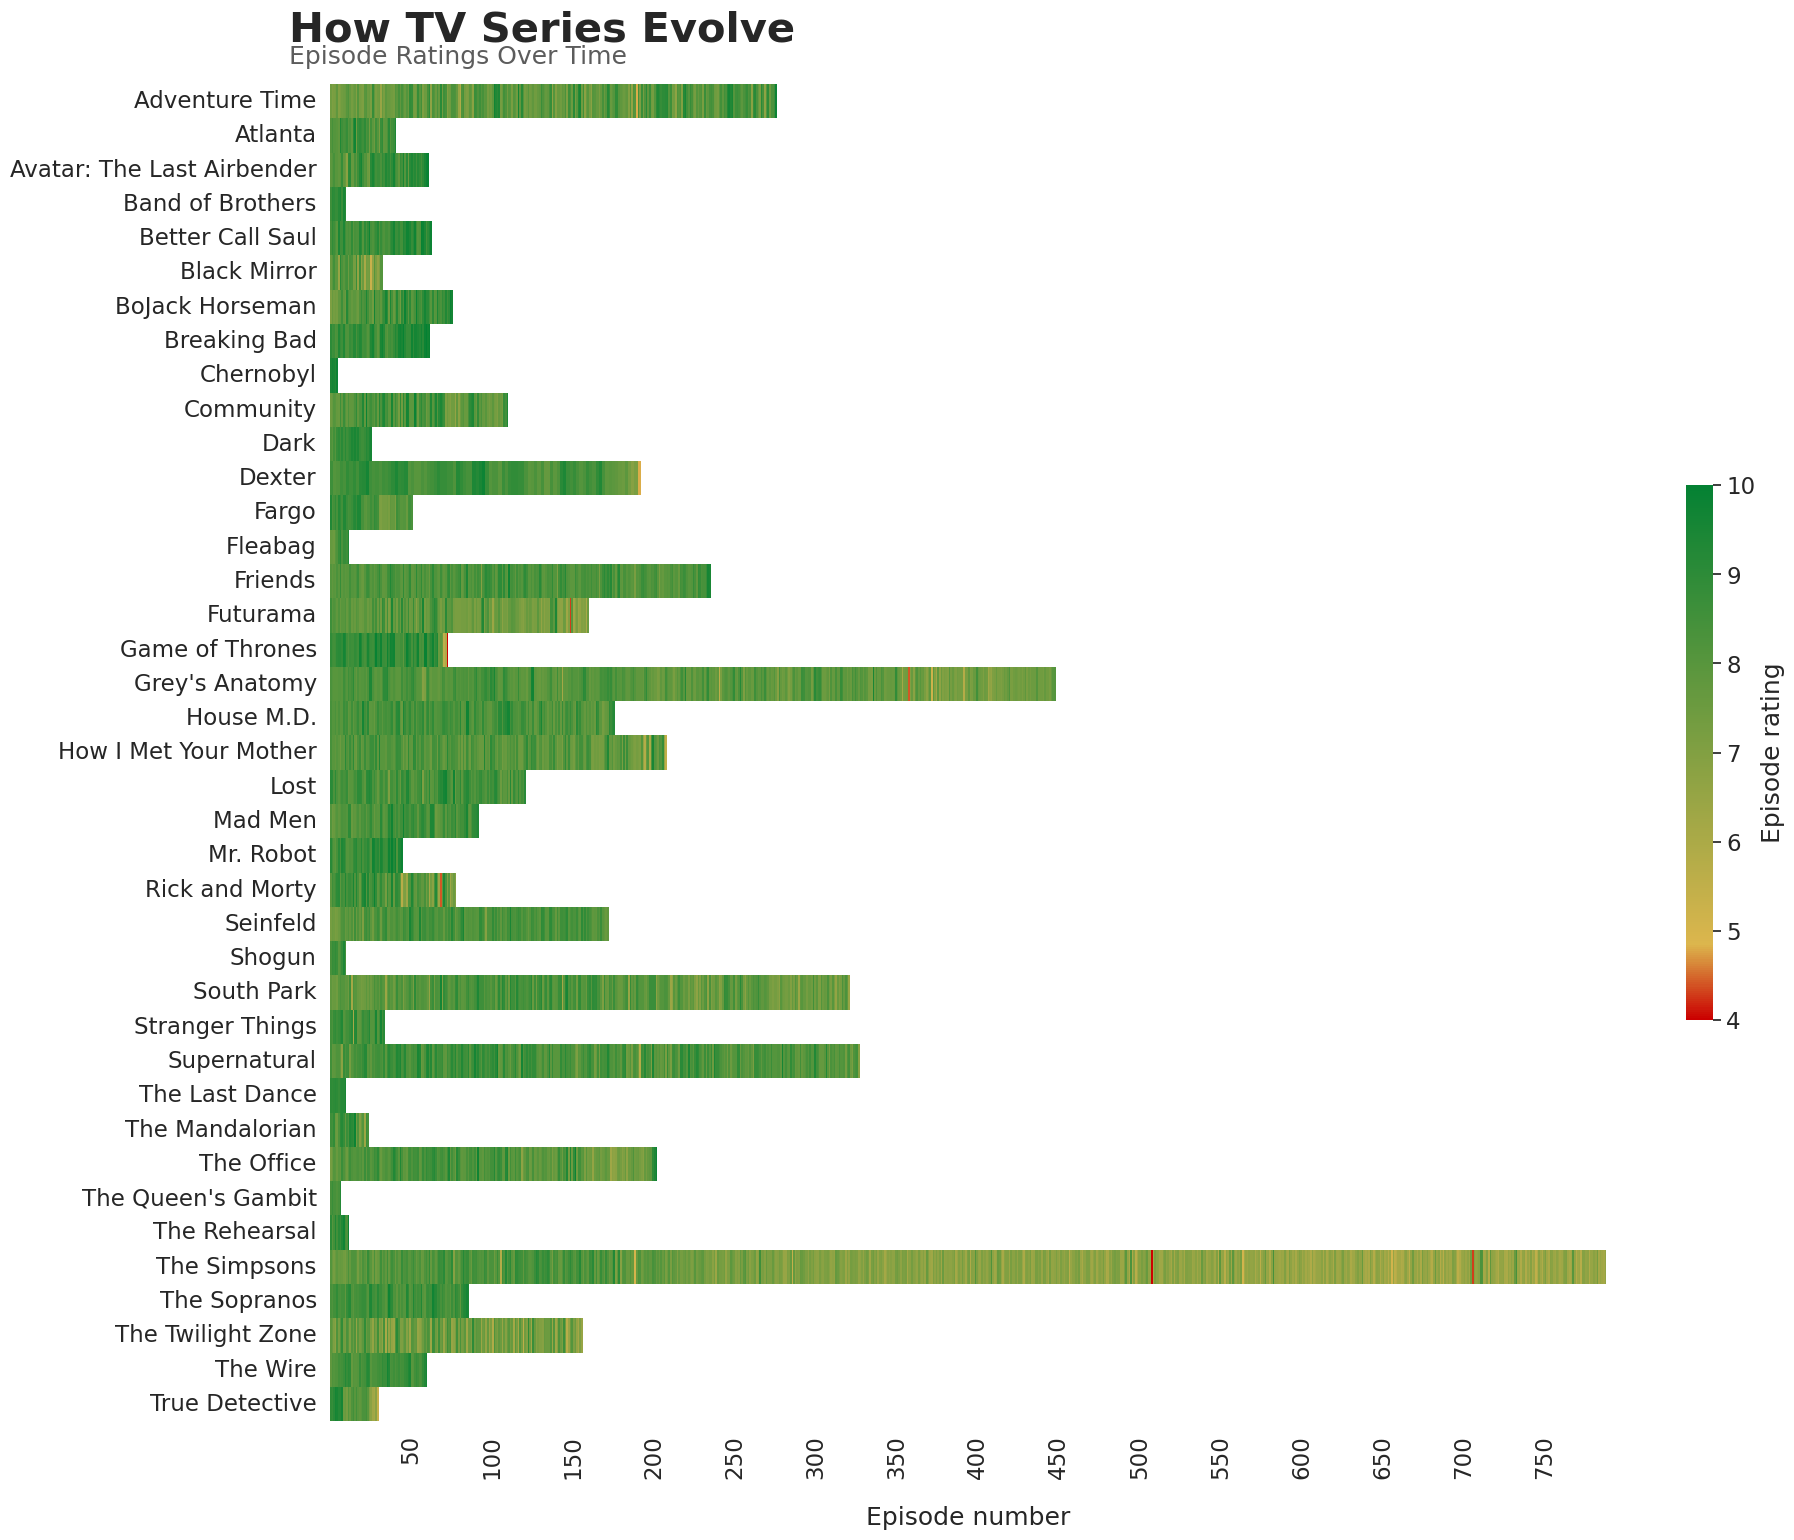

In [14]:
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")

fig=plt.figure(figsize=(20,15))
ax = sns.heatmap(episodes_pivot, cmap=cmap_new2, cbar=True, cbar_kws={'label': 'Episode rating','shrink': 0.4,     # ← reduce el tamaño del colorbar
        'aspect': 20, 'location': 'right' })
plt.xticks(np.arange(50,800,50),np.arange(50,800,50))
plt.xlabel("Episode number",  labelpad = 20)
#plt.ylabel("Series",  labelpad = 20)
fig.tight_layout()
#plt.savefig('series.png', dpi=1000)
plt.ylabel('')

#plt.title(': ')

plt.text(x=-25.5, y=-1., s="How TV Series Evolve", fontsize=30, weight='bold', ha='left', va='bottom')
plt.text(x=-25.5, y=-0.45, s="Episode Ratings Over Time", fontsize=18, alpha=0.75, ha='left', va='bottom')



plt.show()

Text(750, 2.8, 'Source: IMDb')

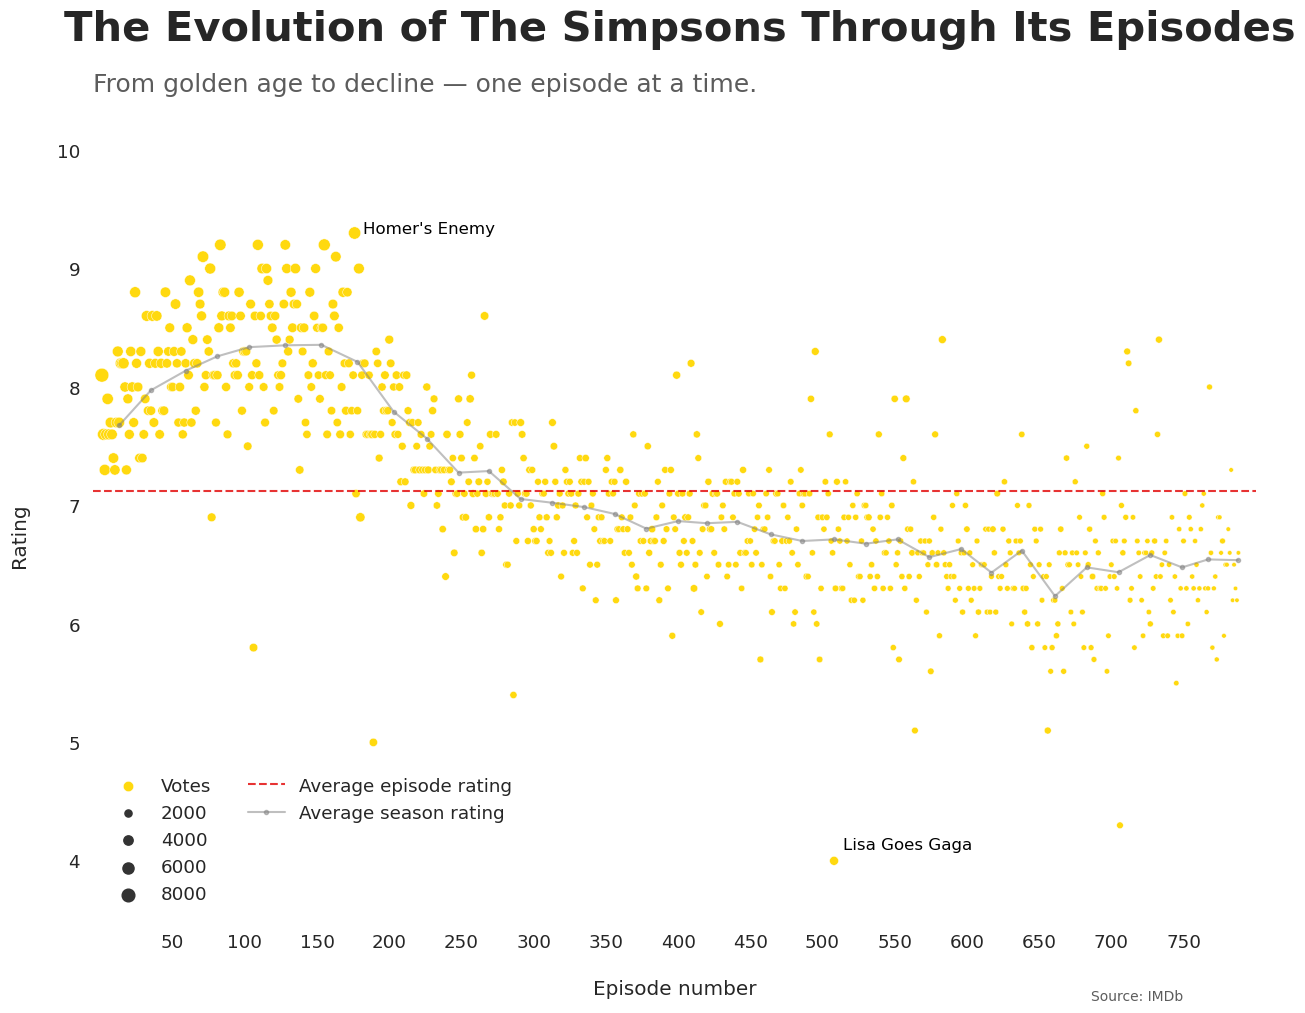

In [15]:

sns.set(font_scale = 1.2)
sns.set_style("white")


fig=plt.figure(figsize=(15,10))



sc=sns.scatterplot(data=episodes[episodes['tv_show']=='The Simpsons'], x="episodes_number_total", y="rating", 
                   legend='brief', color='#FFD90F',  size='votes', sizes=(10, 100), zorder=1, label='Votes')

#line1=sc.axhline(8.7, linestyle='--', color='black', alpha=0.7, label='Series rating', zorder=2)
line2=sc.axhline(episodes[episodes['tv_show']=='The Simpsons']['rating'].mean(), linestyle='--',alpha=0.8, color='#e10000',  
                 label='Average episode rating', zorder=2)

plt.plot(episodes[episodes['tv_show']=='The Simpsons'].groupby('season')['episodes_number_total'].max().values,
        episodes[episodes['tv_show']=='The Simpsons'].groupby('season')['rating'].mean().values, color='gray',
        alpha=0.5, marker='.' ,label='Average season rating')

plt.plot(np.zeros(1), np.zeros([1,2]), color='w', alpha=0, label=' ')


plt.text(176+6, 9.3, "Homer's Enemy", horizontalalignment='left', size='small', color='black')
plt.text(508+6, 4.1, "Lisa Goes Gaga", horizontalalignment='left', size='small', color='black')
plt.xlim([-5, 800])
plt.ylim([3.5, 10])
sns.despine(left=True, bottom=True)


plt.xticks(np.arange(50,800,50),np.arange(50,800,50))
plt.ylabel("Rating",  labelpad = 20)
plt.xlabel("Episode number",  labelpad = 20)

plt.legend(frameon=False, loc='lower left', ncol=2)


plt.text(x=-25.5, y=10.85, s="The Evolution of The Simpsons Through Its Episodes", fontsize=30, weight='bold', ha='left', va='bottom')
plt.text(x=-5.5, y=10.45, s="From golden age to decline — one episode at a time.", fontsize=18, alpha=0.75, ha='left', va='bottom')
plt.text(x=750, y=2.8, s='Source: IMDb', fontsize=10, alpha=0.75, ha='right', va='bottom')
#plt.text(x=40.5, y=2.8, s='Fabián Hernández', fontsize=10, alpha=0.75, ha='left', va='bottom')


#plt.savefig('simpsons_decline.png', dpi=800)


In [16]:
ep_vs_series=pd.DataFrame({'tv_show':episodes.groupby('tv_show')['rating'].mean().index, 
              'rating':series.groupby('title')['rating'].mean().values,
              'episodes_avg_rating':episodes.groupby('tv_show')['rating'].mean().values})

In [17]:
series_subset2=['Mad Men', 'The Sopranos', 'Breaking Bad', 'Fleabag', 'Game of Thrones',
'Atlanta',  'BoJack Horseman', 'The Wire',  'Rick and Morty', 'Seinfeld', 
'Fargo', 'Black Mirror','The Simpsons','Lost','Mr. Robot', 'Friends', 'The Office', 'South Park',
'Better Call Saul', 'How I Met Your Mother', 'The Twilight Zone', 'Community', 'Grey\'s Anatomy',
'Band of Brothers','Chernobyl','House M.D.','True Detective', 'Stranger Things',
'Dark', 'Avatar: The Last Airbender']


In [18]:
data_df=ep_vs_series[ep_vs_series.tv_show.isin(series_subset2)].rename(columns={'tv_show':'series','rating':'series_rating','episodes_avg_rating':'episode_rating'})

In [19]:
data_df[['series','series_rating','episode_rating']].to_csv('data.csv', index=False)

In [20]:
def add_labels(df, parameter, names, yval, position='right', extra_text='', ax=None):
    if ax is None:
        ax = plt.gca()  # Usa el eje actual si no se proporciona uno

    for name in names:
        y_position = df[df[parameter] == name][yval].values[0]

        x_position = 1.1 if position == 'right' else -0.2

        ax.text(x_position,
                y_position,
                f'{name} {extra_text}',
                fontsize=10,
                color='black')


In [22]:


focus_series=['Mad Men', 'The Sopranos', 'Breaking Bad']#, 'Fleabag', 'Game of Thrones',]
reference_series=['Mad Men', 'The Sopranos', 'Breaking Bad', 'Fleabag', 'Game of Thrones','Chernobyl','House M.D.','True Detective', 'Stranger Things',
'Dark', 'Avatar: The Last Airbender']


def parallel(focus_series, reference_series, n_cols = 2):

    n_rows = (len(focus_series) + 1) // n_cols  # para redondear hacia arriba

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 3 * n_rows))  # cada subplot de 3x3
    axes = axes.flatten()  # para iterar fácilmente

    for idx, serie in enumerate(focus_series):
        ax = axes[idx]

        y0 = ep_vs_series[ep_vs_series['tv_show'] == serie].rating.values
        y1 = ep_vs_series[ep_vs_series['tv_show'] == serie].episodes_avg_rating.values

        percent_val = '(' + str(round((y1 - y0)[0] * 100 / y0[0], 2)) + '%)'

        color = 'g' if (y0 - y1)[0] < 0 else 'r'

        ax.plot([0, 1], [y0, y1], marker='o', c=color, zorder=len(reference_series))

        for serie_others in [item for item in reference_series if item != serie]:
            y0_other = ep_vs_series[ep_vs_series['tv_show'] == serie_others].rating.values
            y1_other = ep_vs_series[ep_vs_series['tv_show'] == serie_others].episodes_avg_rating.values
            ax.plot([0, 1], [y0_other, y1_other], marker='o', c='lightgray')

        ax.axvline(x=0., color='black', linestyle='--', linewidth=1)
        ax.axvline(x=1, color='black', linestyle='--', linewidth=1)

        add_labels(ep_vs_series, 'tv_show', [serie], 'episodes_avg_rating', position='right', 
                   extra_text=percent_val, ax=ax) 

        ax.text(-0.2, 10.3, 'Series rating', fontsize=10, color='black')
        ax.text(0.6, 10.3, 'Average episode rating', fontsize=10, color='black')

        ax.set_ylim([7, 10])




        ax.set_xticks([])
        #ax.set_yticks(fontsize=10)
        ax.tick_params(axis='y', labelsize=10)
        ax.grid(False)
        ax.set_frame_on(False)  # equivale a plt.box(False)

    # Elimina subplots vacíos si la cantidad es impar
    for i in range(len(focus_series), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()


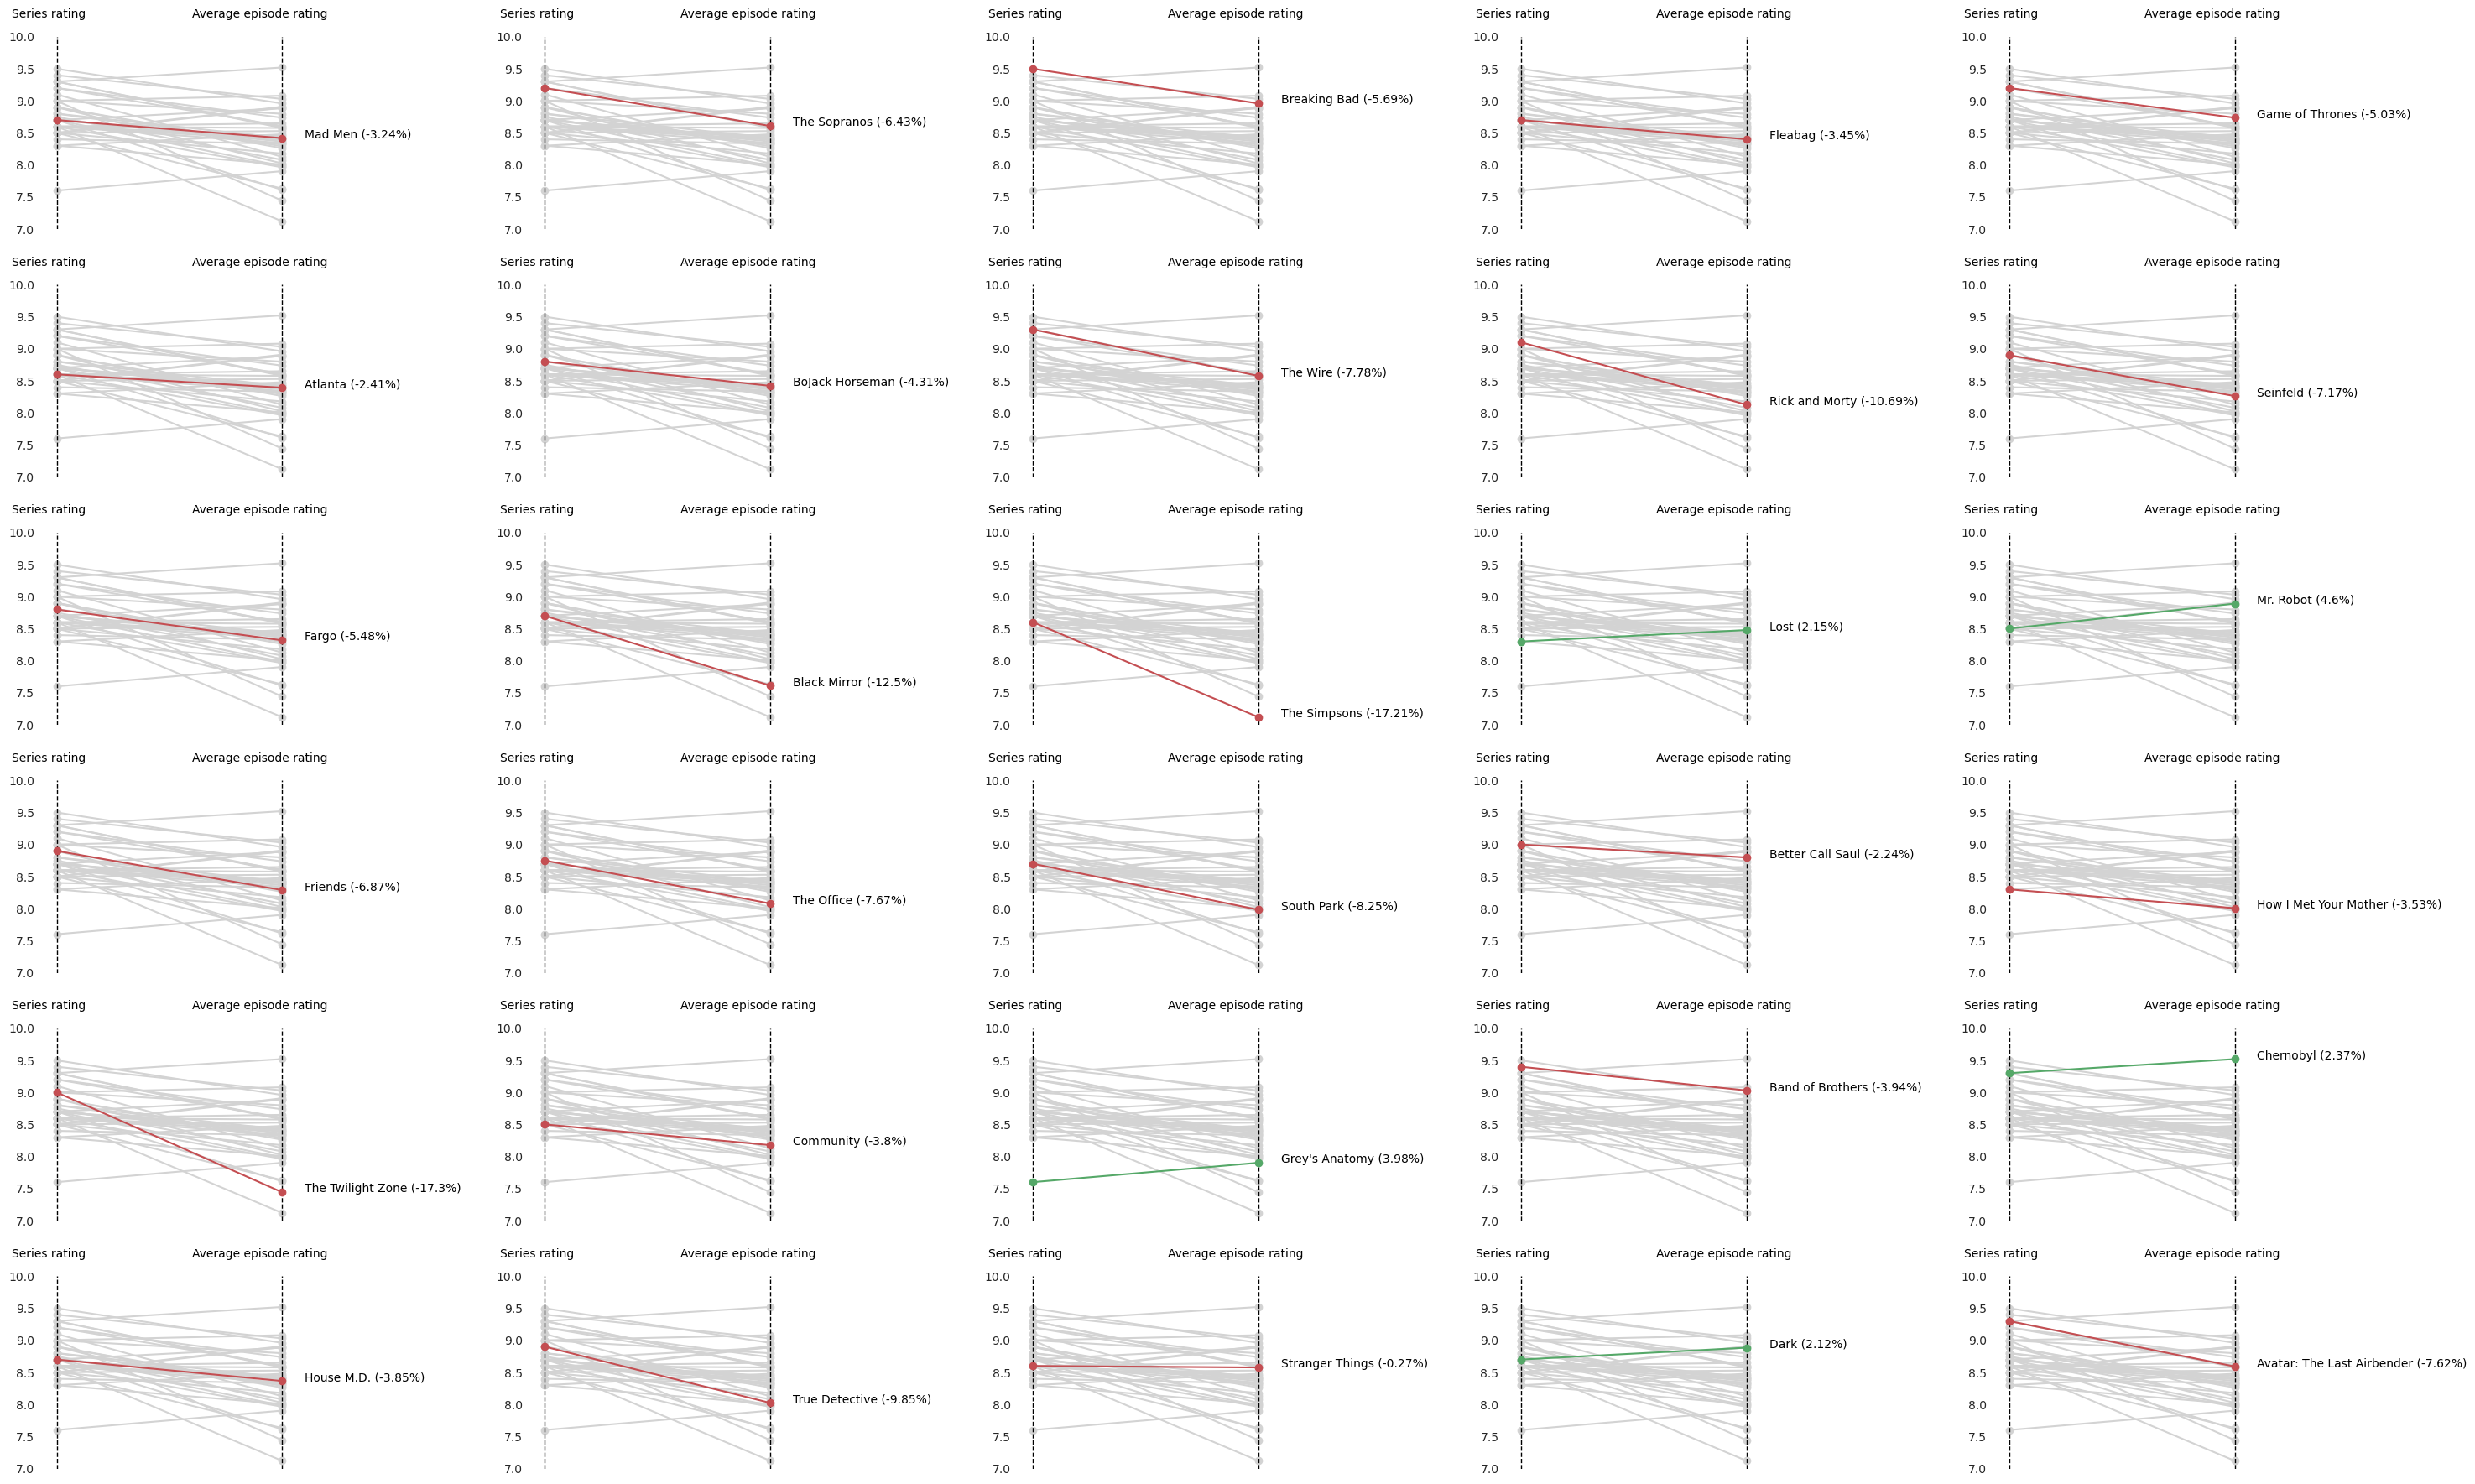

In [28]:
parallel(series_subset2, series_subset, n_cols = 5)

In [24]:
ep_vs_series['diff']= ep_vs_series['episodes_avg_rating'] - ep_vs_series['rating'] 



In [25]:
ep_vs_series['diff_percent']=ep_vs_series['diff']*100/ep_vs_series['rating']

In [26]:
diff_percent=ep_vs_series[ep_vs_series.tv_show.isin(series_subset2)].copy()
diff_percent.sort_values('diff', inplace=True)
diff_percent.reset_index(inplace=True)




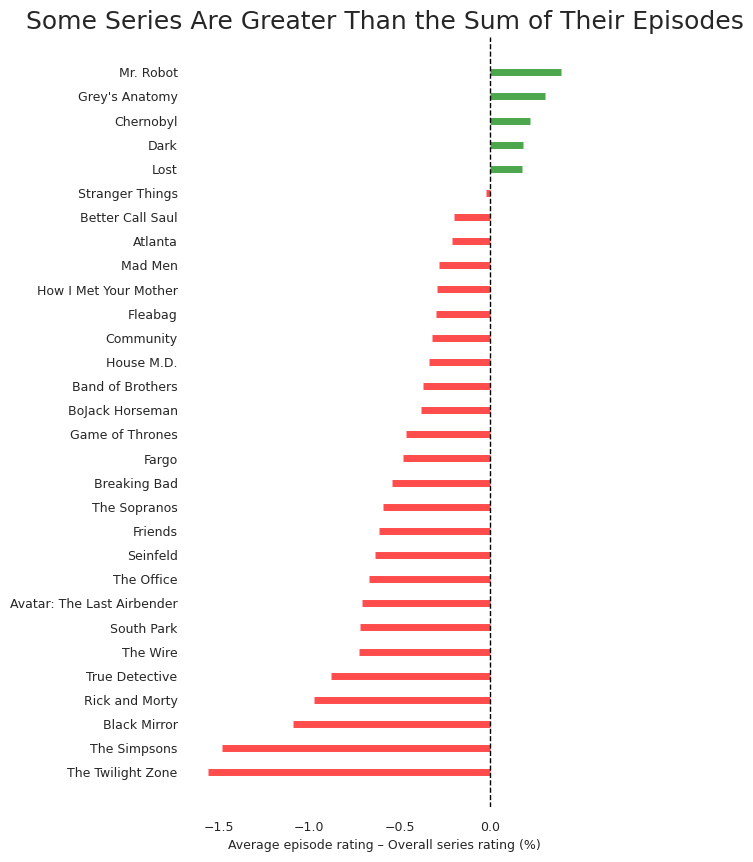

In [27]:
sns.set(font_scale = 1.5)
sns.set_style("white")

fig=plt.figure(figsize=(5,10))
# Plotting the horizontal lines

for i in range(len(diff_percent)):
    
    diff_percent['colors'] = ['red' if float(
        x) < 0. else 'green' for x in diff_percent['diff']]


plt.hlines(y=diff_percent.index, xmin=0, xmax=diff_percent['diff'].values,
            alpha=0.7, linewidth=5, color=diff_percent.colors)
plt.axvline(0, color='black', linestyle='--', linewidth=1)

plt.yticks(diff_percent.index, diff_percent.tv_show, fontsize=9)
plt.xticks(fontsize=9)
plt.xlabel('Average episode rating – Overall series rating (%)', fontsize=9)

plt.title('Some Series Are Greater Than the Sum of Their Episodes')
#plt.subtitle('This chart shows how the average rating per episode compares to the overall IMDb rating of each series. A positive difference suggests a show is better as a whole; a negative one suggests strong individual episodes may not add up to a strong overall impression.')
plt.box(False)

plt.show()